In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import googletrans

In [125]:
def mod_data(data):
    if data - int(data) != 0:
        #data = int(data)
        data = str(data).replace(".", "")
        return data
    else:
        return int(data)

####  1. Կարդալ ֆայլը և վերածել դատաֆրեյմի  OK

In [126]:
file_path = "./other/project-2/Data_Project_2.csv"

In [127]:
df = pd.read_csv(file_path)

In [128]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


####  2. Բաժանեք դատան փոքր մասերի՝
      * Առաջին բանը, որ կարելի է անել, վիզուալիզացնել հրդեհների քանակը ըստ տարիների, ամիսների


In [157]:
df1 = df.groupby(['year'])['number'].sum()
df2 = df.groupby(['month'])['number'].sum()

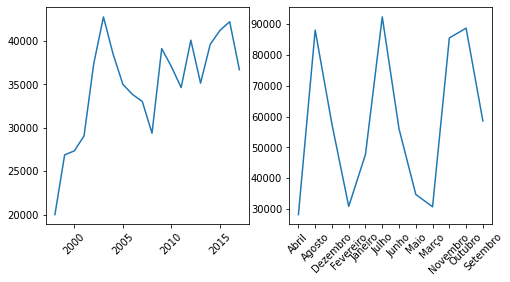

In [164]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(df1)
ax2.plot(df2)
ax1.tick_params(axis = "x", labelrotation=45)
ax2.tick_params(axis = "x", labelrotation=45)

In [102]:
# years = df.groupby(['year']).number.sum()
# years

In [103]:
# years.plot(kind="bar", x='year')

####  Հեռացրեք այն տողերը, որտեղ հրդեհների քանակը 0 է։ Նախ 0֊ները սարքեք Nan, հետո հեռացրեք

In [104]:
# df["number"] = df["number"].apply(mod_data)  # correcting data
# df["number"].replace(0, np.nan, inplace=True)  # raplace 0 with NaN
# df= df.astype('Int32')
# df = df.dropna()

In [105]:
df[1:100]

,year,state,month,number,date
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
...,...,...,...,...,...
95,2013,Acre,Maio,4.0,2013-01-01
96,2014,Acre,Maio,1.0,2014-01-01
97,2015,Acre,Maio,2.0,2015-01-01
98,2016,Acre,Maio,21.0,2016-01-01


#### 3. Խմբավորեք տվյալները ըստ ամիսների։ Արդյունքը լինելու է Series , ընդ որում ամիսները այբբենական կարգով։ Փոխեք, ամիսները ըստ ճիշտ հերթականության reindex֊ի միջոցով։

In [51]:
months = df.groupby(['month'])['number'].sum()
months

month
Abril        28188.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30848.050
Janeiro      47747.844
Julho        92326.113
Junho        56010.675
Maio         34731.363
Março        30717.405
Novembro     85508.054
Outubro      88681.579
Setembro     58578.305
Name: number, dtype: float64

####  4. Googletrans գրադարանի միջոցով թարգմանել ամիսները

In [11]:
def translate_text(txt):
    translator = googletrans.Translator()
    translated = translator.translate(txt, dest="ru")
    return translated.text

In [12]:
translator = googletrans.Translator()
translated = translator.translate('hello', dest="ru")
translated.text

NameError: name 'googletrans' is not defined

In [15]:
translate_text("hello")

'hello'

In [ ]:
df['eng_month'] = df['month'].apply(translate_text).apply(getattr, args=('text',))  # correcting data


#### 5. Վիզուալիզացրեք ստացված տվյալները՝ ներկայացնելով կապը ամիսների և այդ ամիսների ընթացքում եղած հրդեհների քանակի հետ

In [30]:
#df
#months = df.groupby(['month']).number.sum()
dir(months)
months.__repr__
#months.plot(kind="bar", x="month", y="number")

<bound method BaseGroupBy.__repr__ of <pandas.core.groupby.generic.SeriesGroupBy object at 0x071C97A8>>

In [ ]:
Խնդիրը՝
1. Կարդալ ֆայլը և վերածել դատաֆրեյմի, հաշվի առնելով վերևի նշվածները
2. Բաժանեք դատան փոքր մասերի՝
* Առաջին բանը, որ կարելի է անել, վիզուալիզացնել հրդեհների քանակը ըստ տարիների, ամիսների


Հեռացրեք այն տողերը, որտեղ հրդեհների քանակը 0 է։ Նախ 0֊ները սարքեք Nan, հետո հեռացրեք
3. Խմբավորեք տվյալները ըստ ամիսների։ Արդյունքը լինելու է Series , ընդ որում 
ամիսները այբբենական կարգով։ Փոխեք, ամիսները ըստ ճիշտ հերթականության reindex֊ի միջոցով։
4. Googletrans գրադարանի միջոցով թարգմանել ամիսները
5. Վիզուալիզացրեք ստացված տվյալները՝ ներկայացնելով կապը ամիսների և այդ ամիսների ընթացքում եղած հրդեհների քանակի հետ

